In [1]:
import numpy as np
import os

In [12]:
S0 = 186.13              # spot stock price
K = 180               # strike
T = 1.0                 # maturity (1 year)
r = 0.1                 # risk free rate 
sig = 0.53               # annualised volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [13]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [14]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [15]:
S

array([[186.13      , 252.76014536, 343.24230957, 466.11495224],
       [  0.        , 137.06423871, 186.13      , 252.76014536],
       [  0.        ,   0.        , 100.93271119, 137.06423871],
       [  0.        ,   0.        ,   0.        ,  74.32582185]])

In [16]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47862245409039

In [17]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  42.93576129],
       [  0.        ,   0.        ,   0.        , 105.67417815]])

In [18]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 28.71560427,  10.91869788,   0.        ,   0.        ],
       [  0.        ,  46.91991275,  21.65184994,   0.        ],
       [  0.        ,   0.        ,  73.1661869 ,  42.93576129],
       [  0.        ,   0.        ,   0.        , 105.67417815]])

In [19]:
print('European ' + payoff, str( V[0,0]))

European put 28.71560427496742


In [20]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 30.21627288,  10.91869788,   0.        ,   0.        ],
       [  0.        ,  49.8957485 ,  21.65184994,   0.        ],
       [  0.        ,   0.        ,  79.06728881,  42.93576129],
       [  0.        ,   0.        ,   0.        , 105.67417815]])

In [21]:
print('American ' + payoff, str( V[0,0]))

American put 30.21627287918831


In [22]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [23]:
T = 1
r = 0.1
sigma = 0.53
S0 = 186.13
K = 180

In [24]:
S = mcs_simulation_np(1000)

In [25]:
S = np.transpose(S)
S

array([[186.13      , 185.30259107, 186.49078105, ...,  98.39941756,
         98.63531956,  99.07366896],
       [186.13      , 182.53093073, 187.77338727, ..., 205.48029845,
        207.4849846 , 209.7095308 ],
       [186.13      , 180.23119414, 183.0663338 , ..., 118.96960222,
        121.3602428 , 125.0215895 ],
       ...,
       [186.13      , 185.1100289 , 185.72911273, ..., 193.65987712,
        192.24285978, 196.08527026],
       [186.13      , 187.6308434 , 184.13939787, ..., 139.07230622,
        136.09348762, 133.27730112],
       [186.13      , 193.10481118, 196.4395527 , ..., 420.06910904,
        437.7350073 , 438.38439601]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

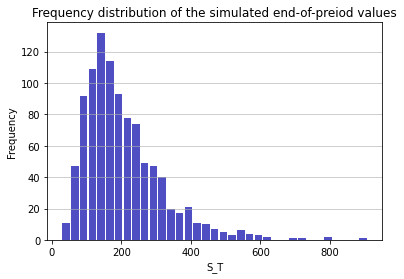

In [26]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [27]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 28.839517449312247


In [28]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 52.913828495420645
